/home/jshimwell/openmc/openmc/model/surface_composite.py:849: UserWarning: Setting boundary_type to a value other than 'transmission' on Polygon composite surfaces can result in unintended behavior. Please use the regions property of the Polygon to generate individual openmc.Cell objects to avoid unwanted behavior.
  warnings.warn("Setting boundary_type to a value other than "


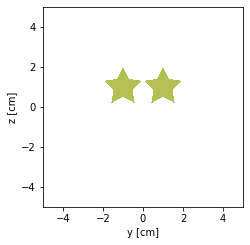

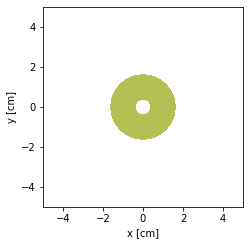

In [87]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
# define a 5 pointed star centered on 1, 1
star = np.array(
    [
        [1.0, 2.0],
        [0.70610737, 1.4045085],
        [0.04894348, 1.30901699],
        [0.52447174, 0.8454915],
        [0.41221475, 0.19098301],
        [1.0, 0.5],
        [1.58778525, 0.19098301],
        [1.47552826, 0.8454915],
        [1.95105652, 1.30901699],
        [1.29389263, 1.4045085],
        [1.0, 2.0],
    ]
)

surf_poly = openmc.model.Polygon(star, basis="rz")
surf_poly.boundary_type='vacuum'
# surf_poly.rotate(5)


region_poly = surf_poly.region

cell_poly = openmc.Cell(region=region_poly)

my_geometry = openmc.Geometry([cell_poly])
my_geometry.root_universe.lower_left = (-max(surf_poly.points[:,1]), -max(surf_poly.points[:,1]), min(surf_poly.points[:,0])) 
my_geometry.root_universe.upper_right = (max(surf_poly.points[:,1]), max(surf_poly.points[:,1]), max(surf_poly.points[:,0])) 
my_geometry.bounding_box=(my_geometry.root_universe.lower_left, my_geometry.root_universe.upper_right)

my_geometry.root_universe.plot(basis='yz')

plt.show()
my_geometry.root_universe.plot(basis='xy', origin=(0,0,1))

plt.show()

# surf_poly2 = surf_poly.offset(0.5)
# region_poly2 = -surf_poly2 & +surf_poly

# cell_poly.rotation=[45,0,0]
# cell_poly2 = openmc.Cell(region=region_poly2)




In [81]:
material_1 = openmc.Material() 
material_1.add_element('Li', 1, percent_type='ao')
material_1.set_density('g/cm3', 0.5)

my_materials = openmc.Materials([material_1])


In [82]:
my_settings = openmc.Settings()
my_settings.batches = 100
my_settings.inactive = 0
my_settings.particles = 50
my_settings.particle = "neutron"
my_settings.run_mode = 'fixed source'

my_source = openmc.Source()
my_source.space = openmc.stats.Point((1, 1, 1))
my_source.angle = openmc.stats.Isotropic()
my_source.energy = openmc.stats.Discrete([14e6], [1])
my_settings.source = my_source



/home/jshimwell/openmc/openmc/source.py:388: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


In [83]:
mesh = openmc.RegularMesh()
mesh.lower_left = (-max(surf_poly.points[:,1]), -max(surf_poly.points[:,1]), min(surf_poly.points[:,0])) 
mesh.upper_right = (max(surf_poly.points[:,1]), max(surf_poly.points[:,1]), max(surf_poly.points[:,0])) 
mesh.dimension=[100, 100, 100] # only 1 cell in the Y dimension
print(mesh)

mesh_filter = openmc.MeshFilter(mesh)
mesh_tally = openmc.Tally(name='tallies_on_mesh')
mesh_tally.filters = [mesh_filter]
mesh_tally.scores = ['flux']
my_tallies = openmc.Tallies([mesh_tally])


RegularMesh
	ID             =	25
	Name           =	
	Dimensions     =	3
	Voxels         =	[100, 100, 100]
	Lower left     =	(-2.0, -2.0, 0.04894348)
	Upper Right    =	(2.0, 2.0, 1.95105652)
	Width          =	None



In [84]:
model = openmc.model.Model(my_geometry, my_materials, my_settings, my_tallies)
output_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

RuntimeError: Failed to open HDF5 file with mode 'w': summary.h5

In [ ]:
results = openmc.StatePoint(output_filename)

my_tally = results.get_tally(scores=['flux'])
my_slice = my_tally.get_slice(scores=['flux'])

my_slice.mean.shape = (mesh.dimension[0], mesh.dimension[1], mesh.dimension[2]) # setting the resolution to the mesh dimensions
